<a href="https://colab.research.google.com/github/alessandropessoa/aprendizado-de-maquina-na-saude/blob/main/arvores_de_decis~ao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator, ClassifierMixin

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [75]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
np.random.seed(42)
n = 100

In [3]:
df= pd.DataFrame({
    'Transparencia': np.random.randint(1, 11, n),
    'Privacidade': np.random.randint(1, 11, n),
    'Vies': np.random.randint(0, 11, n),
    'Impacto_Social': np.random.randint(1, 11, n)
})

In [6]:
# Regras para simular decisão ética
def rotulo(row):
    score = 0.6 * row['Transparencia'] + 0.4 * row['Privacidade']
    if row['Vies'] > 6:
        return 0  # Não aprova
    if score > 7:
        return 1  # Aprova
    if row['Impacto_Social'] < 4:
        return 0
    return 1

In [8]:
df['Aprovar'] = df.apply(rotulo, axis=1)

In [56]:
X = df.drop(columns='Aprovar')
y = df['Aprovar']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 1. Árvore padrão


In [46]:
arvorePadrao= DecisionTreeClassifier(random_state=0)
arvorePadrao.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

# 2. Árvore com pré-poda (máx 2 níveis)

In [47]:
arvorePrePoda = DecisionTreeClassifier(max_depth=2, random_state=0)
arvorePrePoda.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

# 3. Árvore grande + pós-poda (via ccp_alpha)

In [50]:
path = DecisionTreeClassifier(random_state=0).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
melhorScore = 0

In [51]:
for alpha in ccp_alphas:
    arvore = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    arvore.fit(X_train, y_train)
    score = tree.score(X_test, y_test)
    if score > melhorScore:
        melhorScore = score
        melhorArvore = arvore

arvorePosPoda = melhorArvore

In [53]:
arvorePosPoda

DecisionTreeClassifier(ccp_alpha=np.float64(0.0), random_state=0)

# 4. "Árvore oblíqua" simples usando regressão logística

Uma árvore de decisão oblíqua se diferencia das tradicionais porque ela cria cortes oblíquos (hiperplanos), em vez de cortar os dados apenas com base em uma única feature de cada vez (como faz uma árvore CART).

A regressão logística é uma maneira natural de encontrar um plano de separação linear que divide os dados com base em múltiplas variáveis ao mesmo tempo, ou seja:

    Ela encontra um hiperplano definido por:
    w1⋅x1+w2⋅x2+⋯+wn⋅xn+b>0
    w1​⋅x1​+w2​⋅x2​+⋯+wn​⋅xn​+b>0

Esse corte é oblíquo no espaço das variáveis — e por isso, é ideal para simular um nó de uma árvore oblíqua que considera uma combinação linear de features para tomar decisões.

Podemos ainda usar PCA e LDa, se tivermos um rotulo usamos LDA senão usamos PCA

In [70]:
class ArvoreDecisaoObliqua(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.clf = LogisticRegression()
        self.threshold = 0.5

    def fit(self, X, y):
        self.clf.fit(X, y)
        return self

    def predict(self, X):
        probs = self.clf.predict_proba(X)[:, 1]
        return (probs > self.threshold).astype(int)

    def get_feature_weights(self):
        return self.clf.coef_[0], self.clf.intercept_[0]


In [69]:
arovreObliqua = ArvoreDecisaoObliqua()
arovreObliqua.fit(X_train, y_train)
y_pred_obliqua = arovreObliqua.predict(X_test)

In [44]:
arovreObliqua.fit(X_train.values, y_train.values)
predArvoreDecisaoObliqua_obliqua = arovreObliqua.predict(exemplo.values)
print("Árvore oblíqua:", pred_obliqua[0])

Árvore oblíqua: 1


##Arvore obliqua usando PCA

In [72]:
class ArvoreDecisaoObliquaPCA(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.pca = PCA(n_components=1)
        self.threshold = None

    def fit(self, X, y):
        X_proj = self.pca.fit_transform(X)
        # Definir limiar como média dos valores projetados dos positivos
        self.threshold = np.mean(X_proj[y == 1])
        return self

    def predict(self, X):
        X_proj = self.pca.transform(X)
        return (X_proj.ravel() > self.threshold).astype(int)

    def get_vector(self):
        return self.pca.components_[0], self.threshold


In [87]:
arvoreObliquaPCA = ObliqueDecisionPCA()
arvoreObliquaPCA.fit(X_train, y_train)

ObliqueDecisionPCA()

## Arvore obliqua usando LDA

In [79]:
class ArvoreDecisaoObliquaLDA(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.lda = LDA(n_components=1)
        self.threshold = None

    def fit(self, X, y):
        X_proj = self.lda.fit_transform(X, y)
        self.threshold = np.mean(X_proj[y == 1])
        return self

    def predict(self, X):
        X_proj = self.lda.transform(X)
        return (X_proj.ravel() > self.threshold).astype(int)

    def get_vector(self):
        return self.lda.coef_[0], self.threshold


In [85]:
arvoreObliquaLDA =  ArvoreDecisaoObliquaLDA()
arvoreObliquaLDA.fit(X_train, y_train)

ArvoreDecisaoObliquaLDA()

#Avaliar modelos

In [60]:
def avaliar_modelo(nome, modelo, X_test, y_test):
    if hasattr(modelo, "predict"):
        y_pred = modelo.predict(X_test)
    else:
        y_pred = modelo.predict_proba(X_test)[:, 1] > 0.5

    return {
        "Modelo": nome,
        "Acurácia": accuracy_score(y_test, y_pred),
        "Precisão": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1-Score": f1_score(y_test, y_pred, zero_division=0)
    }


In [88]:
resultados = []

resultados.append(avaliar_modelo("Árvore Normal", arvorePadrao, X_test, y_test))
resultados.append(avaliar_modelo("Pré-poda", arvorePrePoda, X_test, y_test))
resultados.append(avaliar_modelo("Pós-poda", arvorePosPoda, X_test, y_test))
resultados.append(avaliar_modelo("Árvore Oblíqua", arovreObliqua, X_test, y_test))
resultados.append(avaliar_modelo("Árvore Oblíqua (PCA)", arvoreObliquaPCA, X_test, y_test))
resultados.append(avaliar_modelo("Árvore Oblíqua (LDA)", arvoreObliquaLDA, X_test, y_test))

In [89]:
df_resultados = pd.DataFrame(resultados)

In [90]:
df_resultados

,Modelo,Acurácia,Precisão,Recall,F1-Score
0,Árvore Normal,0.95,0.909091,1.0,0.952381
1,Pré-poda,0.95,1.000000,0.9,0.947368
2,Pós-poda,0.95,0.909091,1.0,0.952381
3,Árvore Oblíqua,0.85,0.888889,0.8,0.842105
4,Árvore Oblíqua (PCA),0.60,0.571429,0.8,0.666667
5,Árvore Oblíqua (LDA),0.75,0.857143,0.6,0.705882


# Comparar previsões em uma instância de exemplo

In [18]:
exemplo = pd.DataFrame([{
    'Transparencia': 5,
    'Privacidade': 8,
    'Vies': 2,
    'Impacto_Social': 4
}])

In [19]:
print("\n🔍 Previsão para o exemplo ético:")
print("Árvore padrão:", tree_default.predict(exemplo)[0])
print("Pré-poda:", tree_pre_poda.predict(exemplo)[0])
print("Pós-poda:", tree_pos_poda.predict(exemplo)[0])
print("Regressão (oblíqua):", logreg.predict(exemplo)[0])


🔍 Previsão para o exemplo ético:
Árvore padrão: 1
Pré-poda: 1
Pós-poda: 1
Regressão (oblíqua): 1


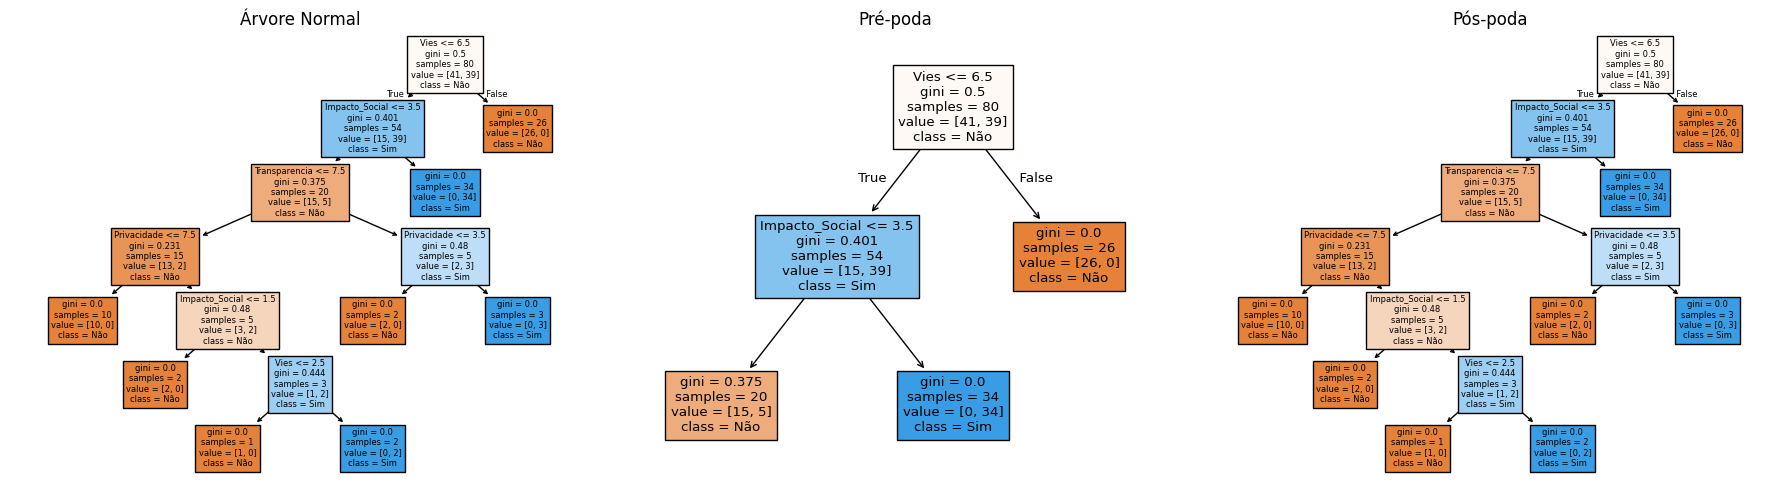

In [54]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

plot_tree(arvorePadrao, filled=True, feature_names=X.columns, class_names=['Não', 'Sim'], ax=axs[0])
axs[0].set_title("Árvore Normal")

plot_tree(arvorePrePoda, filled=True, feature_names=X.columns, class_names=['Não', 'Sim'], ax=axs[1])
axs[1].set_title("Pré-poda")

plot_tree(arvorePosPoda , filled=True, feature_names=X.columns, class_names=['Não', 'Sim'], ax=axs[2])
axs[2].set_title("Pós-poda")

plt.tight_layout()
plt.show()


In [55]:
coef, intercept = oblique.get_feature_weights()
print("🌐 Hiperplano oblíquo:")
for feature, weight in zip(X.columns, coef):
    print(f"{weight:.2f} * {feature}")
print(f"+ {intercept:.2f} > 0  => Aprova")


🌐 Hiperplano oblíquo:
0.08 * Transparencia
0.15 * Privacidade
-0.67 * Vies
0.46 * Impacto_Social
+ -1.17 > 0  => Aprova
